Import librares



Get dataset and understand


Clean the dataset

a. Check for duplicates

b.Check for missing values

c.Check for invalid dtpes

Feature engineering/Data transformation

1. Create new columns if needed

2. Modfy the data


Data analysis

Conclusion


# Import librares

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get dataset and understand

In [71]:
df=pd.read_csv('titanic.csv')
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [72]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

Clean the dataset

a. Check for duplicates

b.Check for missing values

c.Check for invalid dtypes

Check for missing values

In [73]:
df.info()  #here we see the missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Observation:

1. Age column have missing values

2. Fare column have 1 missing data

3. Cabin column must be removed(to many missing values)

4. Embarked column must be handeled





Check for duplcates

In [74]:
df.duplicated().any()

np.False_

In [75]:
df.head(3)


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0


Handle missing data/column

Note:
1. Mode only for alphabetical data
2. when outliers are present use median


In [76]:
md_age=df['age'].median()          

In [77]:
md_fare=df['fare'].median()

In [78]:
m_embarked=df['embarked'].mode()

In [79]:
df['age']=df['age'].fillna(md_age)
df['fare']=df['fare'].fillna(md_fare)
df['embarked']=df['embarked'].fillna(m_embarked)

In [80]:
df=df.drop(columns='cabin')

In [81]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'survived'],
      dtype='object')

Feature engineering/Data transformation

1. Create new columns if needed

2. Modfy the data

In [82]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [83]:
df['embarked']=df['embarked'].replace({'S':'Southapton','C':'Cherbourg','Q':'Queenstown'})

In [84]:
df['Family_count']=df['sibsp']+df['parch']

In [85]:
df.drop(columns=['sibsp','parch'])

,pclass,name,sex,age,ticket,fare,embarked,survived,Family_count
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,Southapton,1,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,Southapton,1,3
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,Southapton,0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,Southapton,0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,Southapton,0,3
...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,2665,14.4542,Cherbourg,0,1
1305,3,"Zabour, Miss. Thamine",female,28.0000,2665,14.4542,Cherbourg,0,1
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,2656,7.2250,Cherbourg,0,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,2670,7.2250,Cherbourg,0,0


In [86]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'survived', 'Family_count'],
      dtype='object')

In [87]:
df[['last_name','Title_first_name']]=df['name'].str.split(',',expand=True)

In [88]:
df.columns
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived,Family_count,last_name,Title_first_name
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southapton,1,0,Allen,Miss. Elisabeth Walton
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southapton,1,3,Allison,Master. Hudson Trevor
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southapton,0,3,Allison,Miss. Helen Loraine
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southapton,0,3,Allison,Mr. Hudson Joshua Creighton
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southapton,0,3,Allison,Mrs. Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,Cherbourg,0,1,Zabour,Miss. Hileni
1305,3,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,Cherbourg,0,1,Zabour,Miss. Thamine
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,Cherbourg,0,0,Zakarian,Mr. Mapriededer
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,Cherbourg,0,0,Zakarian,Mr. Ortin


In [89]:
df[['Title','First_name']]=df['Title_first_name'].str.split('.',n=1,expand=True)

In [90]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked', 'survived', 'Family_count', 'last_name', 'Title_first_name',
       'Title', 'First_name'],
      dtype='object')

In [91]:
df=df.drop(columns='Title_first_name')

In [92]:
lst=['Title','First_name','last_name', 'sex', 'age','Family_count','ticket','pclass','fare','embarked','survived']
df=df[lst]

In [93]:
df=df.rename(columns={'sex':'Gender'})

In [94]:
df.columns

Index(['Title', 'First_name', 'last_name', 'Gender', 'age', 'Family_count',
       'ticket', 'pclass', 'fare', 'embarked', 'survived'],
      dtype='object')

In [95]:
df['age']=df['age'].round(2)
df['fare']=df['fare'].round(2)


In [96]:
def f1(d):
    if d['Family_count']>0:
        return 'family/friends'
    else:
        return 'solo'
df['companion_type']=df.apply(f1,axis=1)

In [97]:
for i in ['Title', 'First_name', 'last_name']:
    df[i]=df[i].str.strip()

In [98]:
df.head(2)

,Title,First_name,last_name,Gender,age,Family_count,ticket,pclass,fare,embarked,survived,companion_type
0,Miss,Elisabeth Walton,Allen,female,29.00,0,24160,1,211.34,Southapton,1,solo
1,Master,Hudson Trevor,Allison,male,0.92,3,113781,1,151.55,Southapton,1,family/friends


Sort the data according to the ascending order of the ticket

In [99]:
df=df.sort_values(by=['ticket'])
df

,Title,First_name,last_name,Gender,age,Family_count,ticket,pclass,fare,embarked,survived,companion_type
67,Miss,Gladys,Cherry,female,30.0,0,110152,1,86.50,Southapton,1,solo
245,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,0,110152,1,86.50,Southapton,1,solo
195,Miss,Roberta,Maioni,female,16.0,0,110152,1,86.50,Southapton,1,solo
289,Miss,Ruth,Taussig,female,18.0,2,110413,1,79.65,Southapton,1,family/friends
291,Mrs,Emil (Tillie Mandelbaum),Taussig,female,39.0,2,110413,1,79.65,Southapton,1,family/friends
...,...,...,...,...,...,...,...,...,...,...,...,...
63,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,female,47.0,1,W.E.P. 5734,1,61.18,Southapton,1,family/friends
62,Mr,Herbert Fuller,Chaffee,male,46.0,1,W.E.P. 5734,1,61.18,Southapton,0,family/friends
433,Mr,Walter,Harris,male,30.0,0,W/C 14208,2,10.50,Southapton,0,solo
81,Capt,Edward Gifford,Crosby,male,70.0,2,WE/P 5735,1,71.00,Southapton,0,family/friends


In [100]:
df=df.reset_index(drop=True)

Create a new column called age_catagory (child,teen,adult,senior)

In [101]:
df['age_catagory']=pd.cut(df['age'],bins=[0,10,20,30,40],labels=['child','teen','adult','senior'],include_lowest=True)

In [102]:
df.columns

Index(['Title', 'First_name', 'last_name', 'Gender', 'age', 'Family_count',
       'ticket', 'pclass', 'fare', 'embarked', 'survived', 'companion_type',
       'age_catagory'],
      dtype='object')

In [103]:
df

,Title,First_name,last_name,Gender,age,Family_count,ticket,pclass,fare,embarked,survived,companion_type,age_catagory
0,Miss,Gladys,Cherry,female,30.0,0,110152,1,86.50,Southapton,1,solo,adult
1,the Countess,of (Lucy Noel Martha Dyer-Edwards),Rothes,female,33.0,0,110152,1,86.50,Southapton,1,solo,senior
2,Miss,Roberta,Maioni,female,16.0,0,110152,1,86.50,Southapton,1,solo,teen
3,Miss,Ruth,Taussig,female,18.0,2,110413,1,79.65,Southapton,1,family/friends,teen
4,Mrs,Emil (Tillie Mandelbaum),Taussig,female,39.0,2,110413,1,79.65,Southapton,1,family/friends,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Mrs,Herbert Fuller (Carrie Constance Toogood),Chaffee,female,47.0,1,W.E.P. 5734,1,61.18,Southapton,1,family/friends,NaN
1305,Mr,Herbert Fuller,Chaffee,male,46.0,1,W.E.P. 5734,1,61.18,Southapton,0,family/friends,NaN
1306,Mr,Walter,Harris,male,30.0,0,W/C 14208,2,10.50,Southapton,0,solo,adult
1307,Capt,Edward Gifford,Crosby,male,70.0,2,WE/P 5735,1,71.00,Southapton,0,family/friends,NaN


# Data analysis

1) Get the count of passengers

In [104]:
df['pclass'].count()

np.int64(1309)

2) Get the passengers details if their fare is 0 

In [105]:
# df.loc[df['fare']==0]

df.query("fare==0")

,Title,First_name,last_name,Gender,age,Family_count,ticket,pclass,fare,embarked,survived,companion_type,age_catagory
22,Mr,Thomas Jr,Andrews,male,39.0,0,112050,1,0.0,Southapton,0,solo,senior
23,Mr,Roderick Robert Crispin,Chisholm,male,28.0,0,112051,1,0.0,Southapton,0,solo,adult
24,Mr,William Henry Marsh,Parr,male,28.0,0,112052,1,0.0,Southapton,0,solo,adult
26,Mr,Joseph Bruce,Ismay,male,49.0,0,112058,1,0.0,Southapton,1,solo,NaN
27,Mr,Richard,Fry,male,28.0,0,112058,1,0.0,Southapton,0,solo,adult
28,Mr,William,Harrison,male,40.0,0,112059,1,0.0,Southapton,0,solo,senior
206,Jonkheer,John George,Reuchlin,male,38.0,0,19972,1,0.0,Southapton,0,solo,senior
278,Mr,"Francis ""Frank""",Parkes,male,28.0,0,239853,2,0.0,Southapton,0,solo,adult
279,Mr,Alfred Fleming,Cunningham,male,28.0,0,239853,2,0.0,Southapton,0,solo,adult
280,Mr,William,Campbell,male,28.0,0,239853,2,0.0,Southapton,0,solo,adult


3) Get the gender wise passengers count,total_fare and survival rate

In [106]:
df.groupby('Gender').agg({'Gender':'count','fare':'sum','survived':'mean'})

,Gender,fare,survived
Gender,,,
female,466,21528.36,0.727468
male,843,22036.78,0.190985


4) Get the pclass wise passenger count,total_fare and survival_rate 

In [107]:
df.groupby(['pclass']).agg({'pclass':'count','fare':'sum','survived':'mean'})

,pclass,fare,survived
pclass,,,
1,323,28265.42,0.619195
2,277,5866.65,0.429603
3,709,9433.07,0.255289


5) Get the gender wise highest and lowest fare

In [108]:
df.groupby('Gender').agg({'fare':['max','min']})

fare      
           max   min
Gender              
female  512.33  6.75
male    512.33  0.00

6) Get the no_of_unique values from ticket columns.

In [109]:
df['ticket'].nunique()

929

7) Get the ticket wise no_of_passengers

In [110]:
df.groupby('ticket').agg({'ticket':'count'})

,ticket
ticket,
110152,3
110413,3
110465,2
110469,1
110489,1
...,...
W./C. 6608,5
W./C. 6609,1
W.E.P. 5734,2


8) Get the survived and non servived passengers count

In [111]:
df.groupby('survived').agg({'survived':'count'})

,survived
survived,
0,809
1,500


9) Get the gender wise survival rate 

In [112]:
df.groupby('Gender').agg({'survived':'mean'})

,survived
Gender,
female,0.727468
male,0.190985


In [113]:
df.columns

Index(['Title', 'First_name', 'last_name', 'Gender', 'age', 'Family_count',
       'ticket', 'pclass', 'fare', 'embarked', 'survived', 'companion_type',
       'age_catagory'],
      dtype='object')

10) Get the correlation for the numerical columns

In [114]:
df.corr(numeric_only=True)

,age,Family_count,pclass,fare,survived
age,1.000000,-0.193742,-0.377908,0.178180,-0.043817
Family_count,-0.193742,1.000000,0.050027,0.226613,0.026876
pclass,-0.377908,0.050027,1.000000,-0.558681,-0.312469
fare,0.178180,0.226613,-0.558681,1.000000,0.244414
survived,-0.043817,0.026876,-0.312469,0.244414,1.000000


11) Get the pclass which has the highest survival rate

In [115]:
df.groupby('pclass')['survived'].mean().idxmax()

np.int64(1)

# PLOTS

1) Plot the total_count of male and female

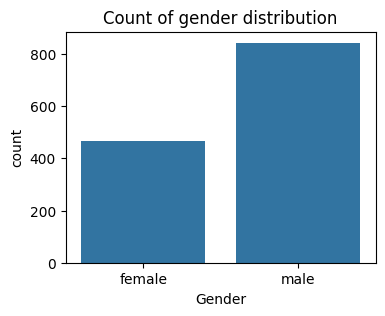

In [116]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Gender')
plt.title("Count of gender distribution")
plt.show()

2) Plot the total_count of male and female in each passenger class

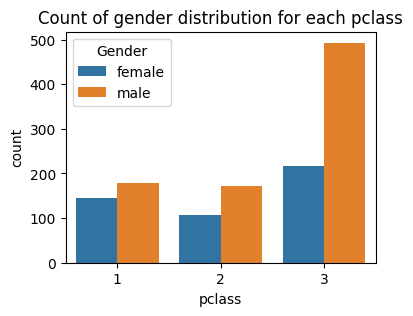

In [117]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,hue='Gender',x='pclass')
plt.title("Count of gender distribution for each pclass")
plt.show()


3) Plot the survivied and non survived count for each gender

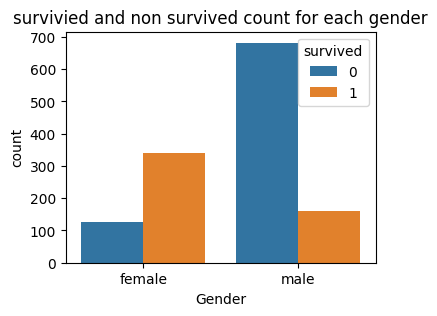

In [118]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Gender',hue='survived')
plt.title("survivied and non survived count for each gender")
plt.show()

4) Plot the distribution of fare

Note: Distribution we can use kde or histogram

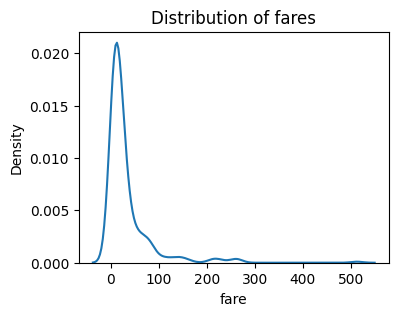

In [119]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=df,x='fare')
plt.title("Distribution of fares")
plt.show()

5) Plot the distribution of age

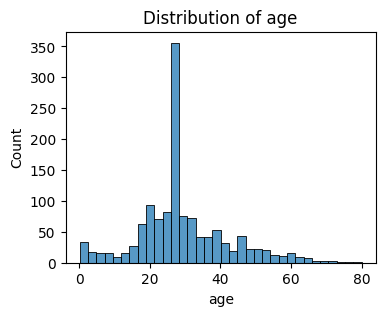

In [120]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='age')
plt.title("Distribution of age")
plt.show()

Note: For percentage and propotion we can use pie chart

6) Plot the percentage of age_catagory

In [121]:
val=df['age_catagory'].value_counts().values
ind=df['age_catagory'].value_counts().index

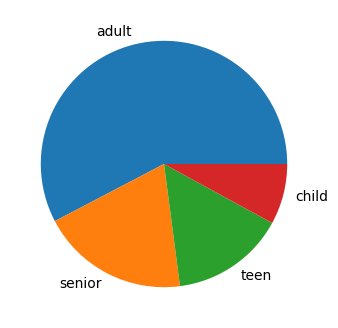

In [122]:
plt.figure(figsize=(6,4))
plt.pie(x=val,labels=ind)
plt.show()

7) Plot the total_fare of each pclass,gender

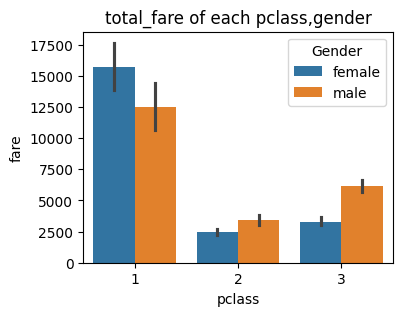

In [123]:

plt.figure(figsize=(4,3))
sns.barplot(data=df,x='pclass',hue='Gender',y='fare',estimator='sum')
plt.title("total_fare of each pclass,gender")
plt.show()

8) Plot the avearge_fare for each pclass

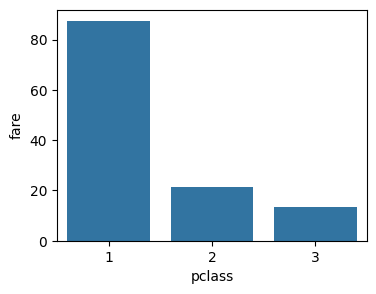

In [124]:
plt.figure(figsize=(4,3))
sns.barplot(data=df,x='pclass',y='fare',estimator='mean',errorbar=None)
plt.show()

9) Plot the survival rate in each pclass

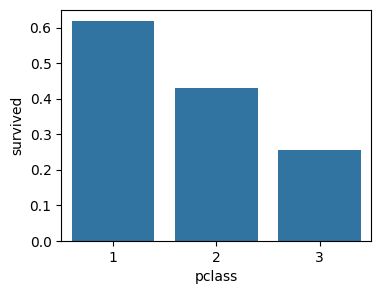

In [125]:
plt.figure(figsize=(4,3))
sns.barplot(data=df,x='pclass',y='survived',errorbar=None)
plt.show()

10) Apply scatterplot for fare and age

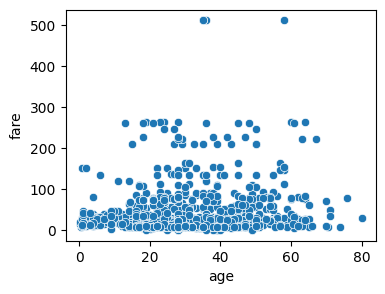

In [126]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df,x='age',y='fare')
plt.show()

11) Detect the outliers (i)age  (ii)fare

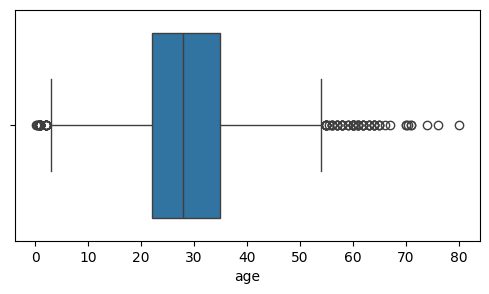

In [127]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df,x='age')
plt.show()

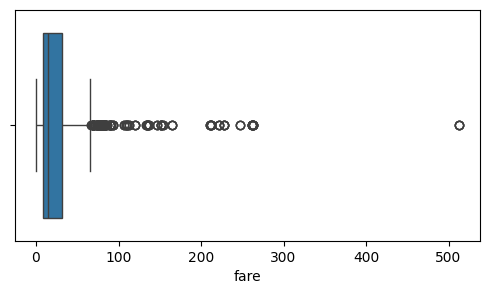

In [144]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df,x='fare')
plt.show()

12) Provide heatmap for numerical columns

In [129]:
g=df.corr(numeric_only=True)
g

,age,Family_count,pclass,fare,survived
age,1.000000,-0.193742,-0.377908,0.178180,-0.043817
Family_count,-0.193742,1.000000,0.050027,0.226613,0.026876
pclass,-0.377908,0.050027,1.000000,-0.558681,-0.312469
fare,0.178180,0.226613,-0.558681,1.000000,0.244414
survived,-0.043817,0.026876,-0.312469,0.244414,1.000000


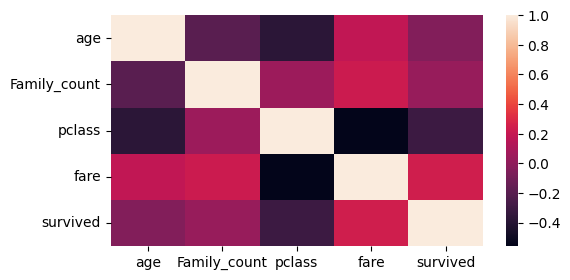

In [130]:
plt.figure(figsize=(6,3))
sns.heatmap(g)
plt.show()

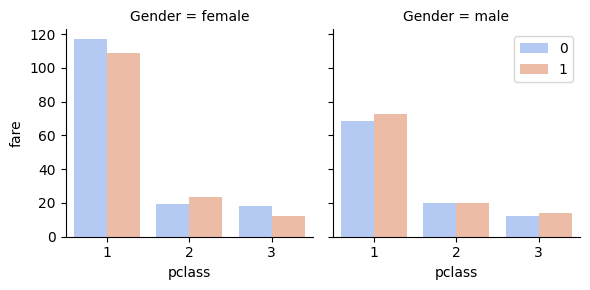

In [146]:
fg=sns.FacetGrid(df,col='Gender')
fg.map_dataframe(sns.barplot,'pclass','fare','survived',palette='coolwarm',errorbar=None,hue_order=[0,1])
plt.legend()
plt.show()